In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt



# file path 
file_path = 'clean_data/california_filtered.csv'

# Read the CSV file
df = pd.read_csv(file_path, low_memory=False)

# filter dataframe to get tax values greater than 0
x = df[df['taxAssessments.2023.value'] > 0]
# selecting important features
features = ['bedrooms', 'bathrooms', 'lotSize', 'squareFootage', 'yearBuilt', 'latitude', 'longitude']
#split features
X = x[features]
y = x['taxAssessments.2023.value'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 5)  
#fit data
clf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=5)

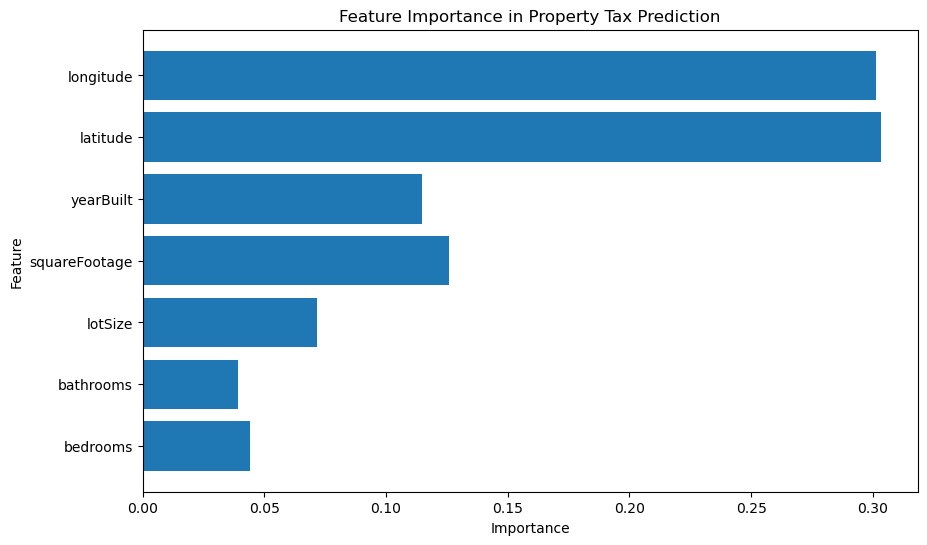

In [2]:
#plot important features
plt.figure(figsize=(10, 6))
plt.barh(features, clf.feature_importances_, align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Property Tax Prediction')
plt.show()

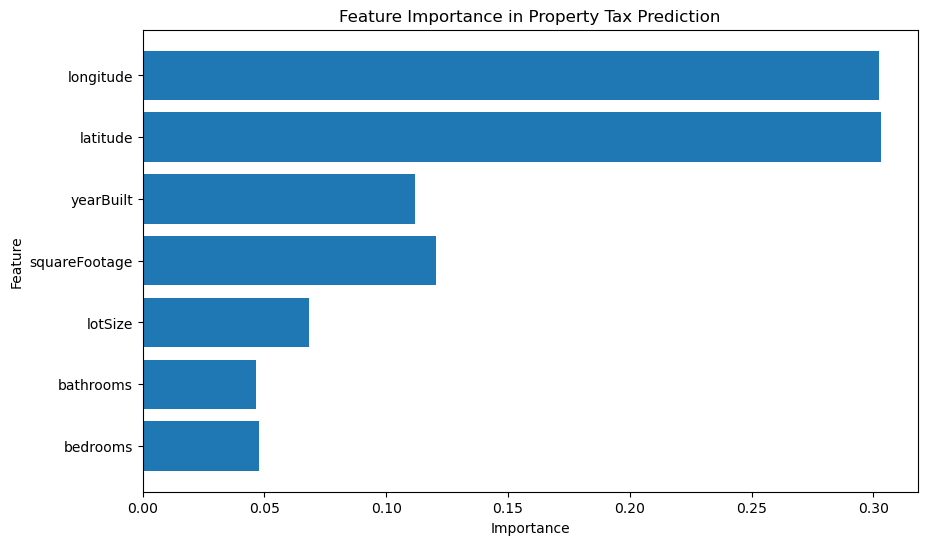

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt



# file path 
file_path = 'clean_data/california_filtered.csv'

# Read the CSV file
df = pd.read_csv(file_path, low_memory=False)

# filter dataframe to get tax values greater than 0
x = df[df['taxAssessments.2022.value'] > 0]
# selecting important features
features = ['bedrooms', 'bathrooms', 'lotSize', 'squareFootage', 'yearBuilt', 'latitude', 'longitude']
#split features
X = x[features]
y = x['taxAssessments.2022.value'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 5)  

#fit data
clf.fit(X_train, y_train)

#plot important features
plt.figure(figsize=(10, 6))
plt.barh(features, clf.feature_importances_, align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Property Tax Prediction')
plt.show()

In [4]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Define the bin edges for splitting into 4 roughly equal sections
bin_edges = [0, 143.25, 286.5, 429.75, 573]  # Based on dividing the range into 4 equal sections

# Assign categories to the 'bedrooms' column
df['bedroom_category'] = pd.cut(df['bedrooms'], bins=bin_edges, labels=["Very Few", "Few", "Many", "Very Many"])





In [6]:
df_clean = df.dropna(subset=['bedroom_category', 'taxAssessments.2022.value'])

# Group the data by bedroom category
from scipy import stats
grouped_data = [df_clean[df_clean['bedroom_category'] == category]['taxAssessments.2022.value'] 
                for category in df_clean['bedroom_category'].unique()]

# Perform the ANOVA test
anova_result = stats.f_oneway(*grouped_data)

# Print the p-value
print("ANOVA p-value:", anova_result.pvalue)

ANOVA p-value: 0.9685833214399667
